In [1]:
___Author___='LumberJack Jyss'

In [2]:
print('LumberJack BRUTAL AtidotCom Naive Bayes\nLumberJack Jyss 5579(c)')

LumberJack BRUTAL AtidotCom Naive Bayes
LumberJack Jyss 5579(c)


In [18]:
import numpy as np
import pandas as pd
import pickle
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score,roc_curve,f1_score, cohen_kappa_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(palette='bright',style='whitegrid')

In [4]:
#df = pd.read_csv('VIX.csv')
df = pd.read_csv('dataset_Ruled.csv')

In [5]:
df = df.dropna()
#df.iloc[0].column=['Date']
#df = df.drop(['Open_spy','High_spy','Low_spy'],axis=1)

In [6]:
df.set_index('Date', inplace=True)
df.head()

,spy_oc,spy_hl,spy_volume,spy_close,vix_close,SPY,short,long
Date,,,,,,,,
20160504 15:30:00,-3.115814,0.124980,-0.344501,-0.003881,-0.016413,205.35,1,0
20160504 16:00:00,-1.750486,0.291626,0.538004,-0.001266,0.021632,205.09,1,0
20160504 17:00:00,-0.444280,-0.279540,-0.443255,-0.000780,-0.000605,204.93,1,0
20160504 18:00:00,0.666223,-0.104462,-0.369692,-0.001269,0.004237,204.67,1,0
20160504 19:00:00,-0.959616,-0.233294,0.077159,0.000000,0.004219,204.67,1,0


In [7]:
delta = df.shape[0]
bloc1 = round(delta*0.9)
bloc2 = delta - bloc1
print("Période d'étude : ",delta,'périodes')
print('Sur un découpage 80% - 20% de la période : ')
print('Bloc 1 : ',bloc1,' périodes \nBloc 2 :',bloc2,' périodes')

Période d'étude :  5256 périodes
Sur un découpage 80% - 20% de la période : 
Bloc 1 :  4730  périodes 
Bloc 2 : 526  périodes


In [8]:
Xtrain_long = df.iloc[:bloc1,:5]
Xtest_long = df.iloc[bloc1:,:5]
ytrain_long = df.iloc[:bloc1,7]
ytest_long = df.iloc[bloc1:,7]

In [9]:
Xtrain_short = df.iloc[:bloc1,:5]
Xtest_short = df.iloc[bloc1:,:5]
ytrain_short = df.iloc[:bloc1,6]
ytest_short = df.iloc[bloc1:,6]
print('Split effectué')

Split effectué


In [10]:
Xtrain_long.shape,Xtest_long.shape,ytrain_long.shape,ytest_long.shape

((4730, 5), (526, 5), (4730,), (526,))

In [11]:
modelGNB_long = GaussianNB()
modelGNB_long.fit(Xtrain_long, ytrain_long)
predictions_long= modelGNB_long.predict(Xtest_long)


modelGNB_short = GaussianNB()
modelGNB_short.fit(Xtrain_short, ytrain_short)
predictions_short= modelGNB_short.predict(Xtest_short)

In [12]:
len(predictions_long),len(ytest_long),len(predictions_short),len(ytest_short)

(526, 526, 526, 526)

In [13]:
(1-sum(predictions_long-ytest_long)/len(ytest_long))*100

89.92395437262357

In [14]:
accuracy_long = accuracy_score(ytest_long, predictions_long)
precision_long=precision_score(ytest_long, predictions_long) # vrais_positifs/(vrais_positifs+faux_positifs)
# La précision permet de mesurer la capacité du modèle à refuser résultats non-pertinents.
recall_long=recall_score(ytest_long, predictions_long) # (vrai_positifs/(vrais_positifs+faux_négatifs))
roc_long=roc_auc_score(ytest_long,predictions_long)
print('RESULTATS LONG\n')
print('Accuracy: %.2f%%' % (accuracy_long * 100.0))
print("Precision: %.2f%% " % (precision_long *100),' => Discrimnination des vrais positifs parmi les faux positifs')
print("Recall: %.2f%% " % (recall_long * 100),' => Positifs trouvés par Golem sur tous les positifs existants')
print("AUC: %.2f%% " % (roc_long *100))
# get probabilities for positive class
prediction_long = modelGNB_long.predict_proba(Xtest_long)
roc_long2 = roc_auc_score(ytest_long, prediction_long[:,1])
print("AUC_proba: %.2f%% " % (roc_long2 * 100))
print(classification_report(ytest_long, predictions_long))
conf_matrix = pd.DataFrame(index = ['vrais_réels','Faux_réels'])
conf_matrix['Vrais_estimés'] = ['Vrais_positifs','Faux_positifs']
conf_matrix['Faux_estimés'] = ['Faux_négatif','Vrais-négatifs']
print(confusion_matrix(ytest_long, predictions_long))
print('Matrice de confusion :')
conf_matrix

RESULTATS LONG

Accuracy: 63.31%
Precision: 66.39%   => Discrimnination des vrais positifs parmi les faux positifs
Recall: 77.64%   => Positifs trouvés par Golem sur tous les positifs existants
AUC: 59.94% 
AUC_proba: 62.82% 
              precision    recall  f1-score   support

           0       0.56      0.42      0.48       213
           1       0.66      0.78      0.72       313

   micro avg       0.63      0.63      0.63       526
   macro avg       0.61      0.60      0.60       526
weighted avg       0.62      0.63      0.62       526

[[ 90 123]
 [ 70 243]]
Matrice de confusion :


,Vrais_estimés,Faux_estimés
vrais_réels,Vrais_positifs,Faux_négatif
Faux_réels,Faux_positifs,Vrais-négatifs


In [15]:
accuracy_short = accuracy_score(ytest_short, predictions_short)
precision_short=precision_score(ytest_short, predictions_short) # vrais_positifs/(vrais_positifs+faux_positifs)
# La précision permet de mesurer la capacité du modèle à refuser résultats non-pertinents.
recall_short=recall_score(ytest_short, predictions_short) # (vrai_positifs/(vrais_positifs+faux_négatifs))
roc_short=roc_auc_score(ytest_short,predictions_short)
print('RESULTATS LONG\n')
print('Accuracy: %.2f%%' % (accuracy_short * 100.0))
print("Precision: %.2f%% " % (precision_short *100),' => Discrimnination des vrais positifs parmi les faux positifs')
print("Recall: %.2f%% " % (recall_short * 100),' => Positifs trouvés par Golem sur tous les positifs existants')
print("AUC: %.2f%% " % (roc_short *100))
# get probabilities for positive class
prediction_short = modelGNB_short.predict_proba(Xtest_short)
roc_short2 = roc_auc_score(ytest_short, prediction_short[:,1])
print("AUC_proba: %.2f%% " % (roc_short2 * 100))
print(classification_report(ytest_short, predictions_short))
conf_matrix = pd.DataFrame(index = ['vrais_réels','Faux_réels'])
conf_matrix['Vrais_estimés'] = ['Vrais_positifs','Faux_positifs']
conf_matrix['Faux_estimés'] = ['Faux_négatif','Vrais-négatifs']
print(confusion_matrix(ytest_short, predictions_short))
print('Matrice de confusion :')
conf_matrix

RESULTATS LONG

Accuracy: 68.82%
Precision: 60.87%   => Discrimnination des vrais positifs parmi les faux positifs
Recall: 23.46%   => Positifs trouvés par Golem sur tous les positifs existants
AUC: 57.84% 
AUC_proba: 65.07% 
              precision    recall  f1-score   support

           0       0.70      0.92      0.80       347
           1       0.61      0.23      0.34       179

   micro avg       0.69      0.69      0.69       526
   macro avg       0.65      0.58      0.57       526
weighted avg       0.67      0.69      0.64       526

[[320  27]
 [137  42]]
Matrice de confusion :


,Vrais_estimés,Faux_estimés
vrais_réels,Vrais_positifs,Faux_négatif
Faux_réels,Faux_positifs,Vrais-négatifs


In [24]:
#The F1 Score or F-score is a weighted average of precision and recall.
#The Kappa or Cohen’s kappa is the classification accuracy normalized by the imbalance of the classes in the data.
print(round(cohen_kappa_score(ytest_long, predictions_long)*100,2),'%')

20.71 %


In [25]:
print(round(f1_score(ytest_long, predictions_long)*100,2),'%')

71.58 %


In [26]:
print(round(cohen_kappa_score(ytest_short, predictions_short)*100,2),'%')

18.42 %


In [27]:
print(round(f1_score(ytest_short, predictions_short)*100,2),'%')

33.87 %


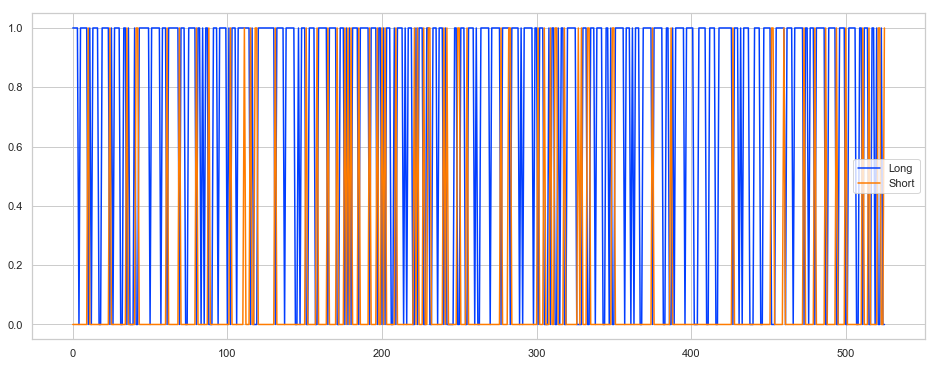

In [16]:
plt.figure(figsize=(16,6))
plt.plot(predictions_long,label = 'Long')
plt.plot(predictions_short,label = 'Short')
plt.legend()

In [65]:
len(predictions_short),len(predictions_long)

(526, 526)

In [66]:
backtest = pd.DataFrame()
backtest['Close_SPY'] = df.iloc[-526:,5]
backtest['long'] = predictions_long
backtest['short'] = predictions_short

In [67]:
backtest.head()

,Close_SPY,long,short
Date,,,
20190114 17:00:00,257.59,1,0
20190114 18:00:00,257.85,1,0
20190114 19:00:00,257.97,1,0
20190114 20:00:00,258.14,1,0
20190114 21:00:00,257.46,0,0


In [68]:
long_pos = 0
short_pos = 0
equity = 200000
price_buy_long = 0
price_buy_short = 0
equity_list = []
nb_transaction = 0
col_profit = []
max_gain = (0,0)
max_loss = (0,0)
stop_loss_short = 0.002
stop_loss_long = -0.002
ticket = 100000
target_long = 0.006
target_short = -0.006
longueur = (backtest.shape[0])-1
long_exit = []
short_exit = []
long_sl = []
short_sl = []
go_long = []
go_short = []
lea = 0
sea = 0
gain_sum = 0
loss_sum = 0

print("Boucle de backtest initiée!")

import sys
orig_stdout = sys.stdout
f = open('backtestv2_5.txt', 'w')
sys.stdout = f

for i in range(0,longueur):
    
    if backtest.iloc[i,1] == 1 and long_pos == 0:
        long_pos = 1
        nb_transaction += 1
        price_buy_long = backtest.iloc[i,0]
        n = (ticket/price_buy_long)
        equity = equity - n/200
        equity_list.append(equity)
        col_profit.append(0)
        go_long.append(1)
        print('\n Go Long enclenché le ',backtest.index[i],' pour $',price_buy_long,'et ',n,' actions')
        print('Nouvel equity :',equity)
        
    elif backtest.iloc[i,1] == 1 and long_pos == 1 :
        equity_list.append(equity)
        print('Le',backtest.index[i],', On maintient la position long ouverte')
        col_profit.append(0)
    
    elif backtest.iloc[i,1] == 0 and long_pos == 1:
        
        if (backtest.iloc[i,0] - price_buy_long)/price_buy_long > target_long:
            print('\n sortie de position long ',backtest.index[i],' pour $',backtest.iloc[i,0])    
            print("Le prix d'achat était de ",price_buy_long)
            print('variation des deux ', backtest.iloc[i,0] - price_buy_long)
            print("variation sur prix d'achat ", (backtest.iloc[i,0] - price_buy_long)/price_buy_long)
            print(' pnl :',( backtest.iloc[i,0] - price_buy_long)*n)
            equity = equity - n/200 + ((backtest.iloc[i,0] - price_buy_long) * n)
            print('Le nouvel equity est de :',equity,'$')
            nb_transaction += 1
            long_exit.append(1)
            col_profit.append(( backtest.iloc[i,0] - price_buy_long) * n)
            if ((backtest.iloc[i-5,0] - price_buy_long) * n) > max_gain[1]:
                max_gain = (i,((backtest.iloc[i,0] - price_buy_long) * n))
                
            elif ((backtest.iloc[i-5,0] - price_buy_long) * n)< max_loss[1]:
                max_loss = (i,((backtest.iloc[i,0] - price_buy_long) * n))
            equity_list.append(equity)
            gain_sum = gain_sum + (backtest.iloc[i,0] - price_buy_long)*n
            long_pos = 0
        
        elif (backtest.iloc[i,0] - price_buy_long)/price_buy_long < stop_loss_long:
            equity = equity - n/200 + ((backtest.iloc[i,0] - price_buy_long) * n)
            print('\n sortie stop_loss du long ',backtest.index[i],' pour $',backtest.iloc[i,0])    
            print("Le prix d'achat était de ",price_buy_long)
            print(' pnl :',(backtest.iloc[i,0] - price_buy_long)*n)
            print('Le nouvel equity est de :',equity,'$')
            nb_transaction += 1
            long_sl.append(1)
            col_profit.append(((backtest.iloc[i,0] - price_buy_long) * n))
            if ((backtest.iloc[i,0] - price_buy_long) * n) > max_gain[1]:
                max_gain = (i-5,((backtest.iloc[i,0] - price_buy_long) * n))
                
            elif ((backtest.iloc[i,0] - price_buy_long) * n)< max_loss[1]:
                max_loss = (i-5,((backtest.iloc[i,0] - price_buy_long) * n))
            equity_list.append(equity)
            long_pos = 0
            loss_sum = loss_sum + abs(( backtest.iloc[i,0] - price_buy_long)*n)
        
    elif backtest.iloc[i,1] == 0 and long_pos == 0 :
        equity_list.append(equity)
        print('Le',backtest.index[i],', il ne se passe rien')
        col_profit.append(0)
            
for i in range(0,longueur):
    
    if backtest.iloc[i,2] == 1 and short_pos == 0:
        short_pos = 1
        nb_transaction += 1
        price_buy_short = backtest.iloc[i,0]
        n = ticket/price_buy_short
        equity = equity - n/200
        equity_list.append(equity)
        col_profit.append(0)
        go_short.append(1)
        print('\n Go Short le ',backtest.index[i],' pour $',price_buy_short)
        print('Le nouvel equity est de :',equity,'$')
        
    elif backtest.iloc[i,2] == 1 and short_pos == 1 :
        equity_list.append(equity)
        print('Le',backtest.index[i],', on reste en position Short')
        col_profit.append(0)
    
    elif backtest.iloc[i,2] == 0 and short_pos == 1:
        
        if (backtest.iloc[i,0] - price_buy_short)/price_buy_short < target_short:
            print('\n sortie du position short ',backtest.index[i],' pour $',backtest.iloc[i,0])    
            print("Le prix d'achat était de ",price_buy_short)
            print(' pnl :',( backtest.iloc[i,0] - price_buy_short)*n)
            equity = equity - n/200 + abs((backtest.iloc[i,0] - price_buy_short) * n)
            print('Le nouvel equity est de :',equity,'$')
            nb_transaction += 1
            short_exit.append(1)
            col_profit.append(abs((( backtest.iloc[i,0] - price_buy_short) * n)))
            if ((backtest.iloc[i,0] - price_buy_short) * n) > max_gain[1]:
                max_gain = (i,((backtest.iloc[i,0] - price_buy_short) * n))
                
            elif ((backtest.iloc[i,0] - price_buy_short) * n)< max_loss[1]:
                max_loss = (i,((backtest.iloc[i,0] - price_buy_short) * n))
            equity_list.append(equity)
            short_pos = 0
            gain_sum = gain_sum + abs((backtest.iloc[i,0] - price_buy_short) * n)
        
        elif (backtest.iloc[i,0] - price_buy_short) > stop_loss_short:
            equity = equity - n/200 - abs((backtest.iloc[i,0] - price_buy_short)* n)
            print('\n sortie stop_loss du short ',backtest.index[i],' pour $',backtest.iloc[i,0])    
            print("Le prix d'achat était de ",price_buy_short)
            print(' pnl :',-(backtest.iloc[i,0] - price_buy_short)*n)
            print('Le nouvel equity est de :',equity,'$')
            nb_transaction += 1
            short_sl.append(1)
            col_profit.append(((backtest.iloc[i,0] - price_buy_short) * n))
            if ((backtest.iloc[i,0] - price_buy_short) * n) > max_gain[1]:
                max_gain = (i,((backtest.iloc[i,0] - price_buy_short) * n))
                
            elif ((backtest.iloc[i,0] - price_buy_short) * n)< max_loss[1]:
                max_loss = (i,((backtest.iloc[i,0] - price_buy_short) * n))
            equity_list.append(equity)
            short_pos = 0
            loss_sum = loss_sum + abs((backtest.iloc[i,0] - price_buy_short) * n)
        
    elif backtest.iloc[i,2] == 0 and short_pos == 0 :
        equity_list.append(equity)
        print('Le',backtest.index[i],', il ne se passe rien')
        col_profit.append(0)    


if long_pos == 1 :
    print("Sortie d'une position long en l'air")
    equity = equity - n/200 + ((backtest.iloc[longueur,0]- price_buy_long) * n)
    lea = 1
if short_pos == 1 :
    print("Sortie d'une position short en l'air")
    equity = equity - n/200 + ((backtest.iloc[longueur,0]- price_buy_short) * n)
    sea = 1
    
            
print("\n\033[95m \033[1m Les gains faramineux s'élèvent à : $",equity-200000,'!. En ',nb_transaction,' transactions.' )
f.close()
sys.stdout = orig_stdout
print('Boucle terminée')
print("\n\033[95m \033[1m Les gains faramineux s'élèvent à : $",equity-200000,'!. En ',nb_transaction,' transactions.' )



Boucle de backtest initiée!
Boucle terminée

  Les gains faramineux s'élèvent à : $ 10406.392034438613 !. En  187  transactions.


In [70]:
backtest_graph = pd.DataFrame()
backtest_graph['equity'] = equity_list
backtest_graph['col_profit'] = col_profit

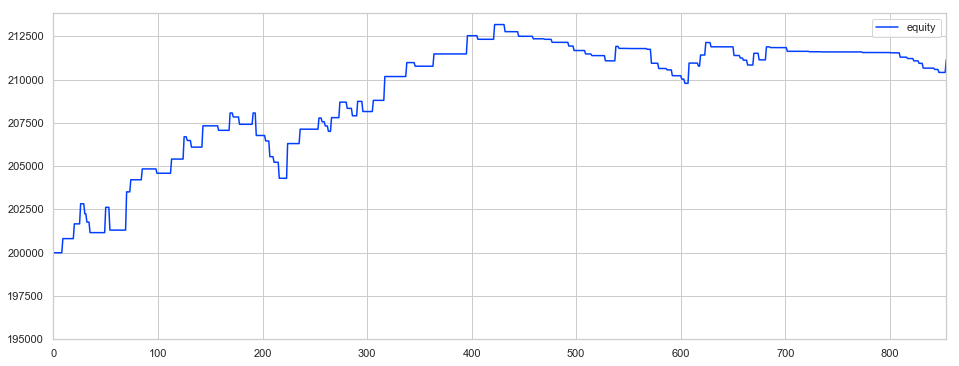

In [72]:
plt.figure(figsize=(16,6))
backtest_graph['equity'].plot(ylim=(195000))
plt.legend()

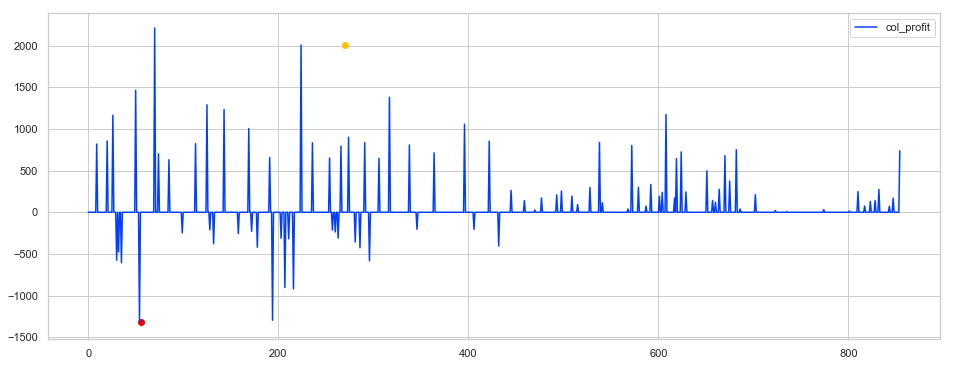

In [73]:
plt.figure(figsize=(16,6))
plt.plot(backtest_graph['col_profit'])
plt.scatter(max_gain[0],max_gain[1],c='y')
plt.scatter(max_loss[0],max_loss[1],c='r')
plt.legend()

In [74]:
cumul_profit = sum(col_profit)
nul_profit = col_profit.count(0)
len_profit = len(col_profit)

In [75]:
print('Période testée :')
print('Début : ',backtest.index[0])
print('Fin : ',backtest.index[-1])
print('ROC long : ',round(roc_long*100,2),'%')
print('ROC short : ',round(roc_short*100,2),'%')
print('Transaction à $100,000')
print('Equity initiale : $200,000')
print('Equity finale : ',round(equity,2))
print('Gain généré :',round(equity-200000,2),'$')
print('Nombre de transactions : ',nb_transaction)
print('Nombre de Long : ',sum(go_long))
print('Nombre de Short : ',sum(go_short))
print('Nombre winners : ',sum(long_exit) + sum(short_exit))
print('Nombre loosers : ',sum(long_sl) + sum(short_sl))
print('Nombre de long winners : ',sum(long_exit))
print('Nombre de short winners : ',sum(short_exit))
print('Nombre de long loosers : ',sum(long_sl))
print('Nombre de short loosers : ',sum(short_sl))
print("Nombre de short en l'air : ", sea)
print("Nombre long en l'air : ",lea)
print('Fees : ',nb_transaction*1.5)
#print('Nombre de positions gagnées',sum(col_is_win))
#print('Nombre de positions perdues',sum(col_close_pos)-sum(col_is_win))
print('Gain maximal',round(max(col_profit),2),' ',round(max_gain[1],2))
print('Perte maximale',round(min(col_profit),2),' ',round(max_loss[1],2))
print('Moyenne du gain',round(((equity-200000)/(nb_transaction/2)),2))
print('Somme de tous les gains',round(gain_sum,2))
print('Somme de tous le loss',round(abs(loss_sum),2))
print('profit factor',round(abs(gain_sum/loss_sum),2))

Période testée :
Début :  20190114  17:00:00
Fin :  20190502  17:00:00
ROC long :  59.94 %
ROC short :  57.84 %
Transaction à $100,000
Equity initiale : $200,000
Equity finale :  210406.39
Gain généré : 10406.39 $
Nombre de transactions :  187
Nombre de Long :  49
Nombre de Short :  45
Nombre winners :  31
Nombre loosers :  62
Nombre de long winners :  24
Nombre de short winners :  7
Nombre de long loosers :  24
Nombre de short loosers :  38
Nombre de short en l'air :  0
Nombre long en l'air :  1
Fees :  280.5
Gain maximal 2211.9   2007.18
Perte maximale -1311.04   -1311.04
Moyenne du gain 111.3
Somme de tous les gains 29890.39
Somme de tous le loss 18406.69
profit factor 1.62


In [81]:
# save the model to disk
filename = 'Bayesfinalized_model_long.sav'
pickle.dump(modelGNB_long, open(filename, 'wb'))
filename = 'Bayesfinalized_model_short.sav'
pickle.dump(modelGNB_short, open(filename, 'wb'))

# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X_test, Y_test)
print(result)